 <a id='hypertextlink'></a>

## Table of Content

* [Importing Libraries](#libraries)
* [Reading Dataset](#dataset)
* [Preprocessing Data](#preprocessing)
* [Total number of reviews](#reviews_no)
* [Percent of 1, 2, 3, 4 and 5 star reviews](#reviews_percent)
* [Modelling with new Column](#modelling_new_column)
* [Splitting Dataset into Test and Training Set](#split)
* [Matrix 1: Unigram Single Words](#unigrams)
* [Matrix 2: Ngrams = 2](#2_ngrams)
* [Logistic Regression](#log_reg)
* [Error Metric](#error_metric)
* [Multinomial Naive Bayes](#multinomialNB)



# <center>Classification of as Positive or Negative</center>

<a id='libraries'></a>

## Importing Libraries

In [101]:
import nltk
import pandas as pd
import re  # Text preprocessing steps - remove numbers, captial letters and punctuation
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='dataset'></a>

##  Reading Dataset

In [107]:
data = pd.read_csv('../coffee.csv')
data.head()

,user_id,stars,reviews
0,A2XP9IN4JOMROD,1,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,5,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,2,I bought the Grove Square hazelnut cappuccino ...
3,A3CZD34ZTUJME7,1,"I love my Keurig, and I love most of the Keuri..."
4,AWKN396SHAQGP,1,It's a powdered drink. No filter in k-cup.<br ...


<a id='preprocessing'></a>

## Preprocessing

In [9]:

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['reviews'] = data.reviews.map(alphanumeric).map(punc_lower)
data.head()

,user_id,stars,reviews
0,A2XP9IN4JOMROD,1,i wanted to love this i was even prepared for...
1,A2TS09JCXNV1VD,5,grove square cappuccino cups were excellent t...
2,AJ3L5J7GN09SV,2,i bought the grove square hazelnut cappuccino ...
3,A3CZD34ZTUJME7,1,i love my keurig and i love most of the keuri...
4,AWKN396SHAQGP,1,it s a powdered drink no filter in k cup br ...


<a id='reviews_no'></a>

## Number of Reviews

In [11]:
data['reviews'].count()

542


<a id='reviews_percent'></a>

##  Percent Reviews

In [12]:
data['stars'].value_counts(normalize= True)*100

5    56.826568
1    17.712177
4    11.992620
2     8.302583
3     5.166052
Name: stars, dtype: float64

 <a id='modelling_new_column'></a>

## Modelling New Column 

In [82]:
data['star_polarity'] = 0

for i in range(len(data['reviews'])):
    if data['stars'][i]==4 or data['stars'][i]==5:
                data['star_polarity'][i] = 'positive'
    elif data['stars'][i]==1 or data['stars'][i]==2 or data['stars'][i] ==3:
         data['star_polarity'][i] = 'negative'
    else:
        data.drop(data['star_polarity'][i])

C:\Users\DayoBanjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\DayoBanjo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [83]:
data.head()

,user_id,stars,reviews,star_polarity
0,A2XP9IN4JOMROD,1,i wanted to love this i was even prepared for...,negative
1,A2TS09JCXNV1VD,5,grove square cappuccino cups were excellent t...,positive
2,AJ3L5J7GN09SV,2,i bought the grove square hazelnut cappuccino ...,negative
3,A3CZD34ZTUJME7,1,i love my keurig and i love most of the keuri...,negative
4,AWKN396SHAQGP,1,it s a powdered drink no filter in k cup br ...,negative


In [84]:
data['star_polarity'].value_counts(normalize= True)*100

positive    68.819188
negative    31.180812
Name: star_polarity, dtype: float64

In [85]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['reviews'] = data.reviews.map(alphanumeric).map(punc_lower)
data.head()

,user_id,stars,reviews,star_polarity
0,A2XP9IN4JOMROD,1,i wanted to love this i was even prepared for...,negative
1,A2TS09JCXNV1VD,5,grove square cappuccino cups were excellent t...,positive
2,AJ3L5J7GN09SV,2,i bought the grove square hazelnut cappuccino ...,negative
3,A3CZD34ZTUJME7,1,i love my keurig and i love most of the keuri...,negative
4,AWKN396SHAQGP,1,it s a powdered drink no filter in k cup br ...,negative


<a id ='split'></a>

## Spliting Dataset into Test and Training Set

In [86]:
target = data['star_polarity']
features = data['reviews']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.33, random_state = 0)

In [78]:
y_train.shape

(363,)

<a id ='unigrams'></a>

### Creation of Matrix 1: Terms should be unigram (single word), and values should be word counts

In [87]:
ngram_size = 1

vectorizer_1 = CountVectorizer(ngram_range=(1,1), stop_words= 'english')
X_train_cv_1 = vectorizer_1.fit_transform(X_train) # fit_transform learns the vocab and one-hot-encodes

X_test_cv_1 = vectorizer_1.transform(X_test) # transform uses the same vocab and one-hot-encodes
X_test_cv_1.shape

(179, 1626)

<a id ='2_ngrams'></a>

### Creation of Matrix 2: Terms should be ngrams =2 (single words), and values should be word counts

In [88]:
ngram_size = 2
vectorizer_2 = CountVectorizer(ngram_range=(1,2), stop_words= 'english')
X_train_cv_2 = vectorizer_2.fit_transform(X_train) # fit_transform learns the vocab and one-hot-encodes

X_test_cv_2 = vectorizer_2.transform(X_test) # transform uses the same vocab and one-hot-encodes

#Print the dimensions of the training set 
print(X_train_cv_2.toarray().shape)

(363, 7774)


In [91]:
cv = CountVectorizer(stop_words='english')
X_train_cv = cv.fit_transform(X_train) # fit_transform learns the vocab and one-hot encodes
X_test_cv = cv.transform(X_test) # transform uses the same vocab and one-hot encodes




print(X_train_cv.toarray().shape)


(363, 1626)


<a id ='log_reg'></a>

## Logistic Regression

In [90]:
classifier = LogisticRegression()
classifier.fit(X_train_cv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
y_pred_cv = classifier.predict(X_test_cv)
y_pred_cv

array(['negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positi

<a d='error_metric'></a>

## Error Metric

In [ ]:
Error Metrics
• Accuracy = (TP + TN) / All
• Precision = TP / (TP + FP)
• Recall = TP / (TP + FN)
• F1 Score = 2*(P*R)/(P+R)

Accuracy: 0.866
Precision: 0.874
Recall: 0.944
F1 Score: 0.908


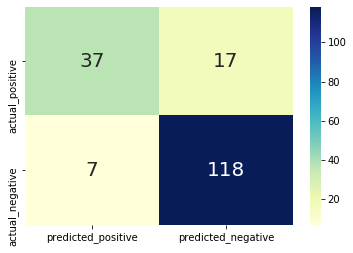

In [103]:
cm = confusion_matrix(y_test, y_pred_cv)
sns.heatmap(cm, xticklabels=['predicted_positive', 'predicted_negative'], yticklabels=['actual_positive', 'actual_negative'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))

<a id='multinomialNB'></a>

## Multinomial Naive Bayes Algorithms

In [104]:
nb = MultinomialNB()
# Train the model
nb.fit(X_train_cv, y_train)
# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv

y_pred_cv_nb = nb.predict(X_test_cv)

Accuracy: 0.866
Precision: 0.858
Recall: 0.968
F1 Score: 0.91


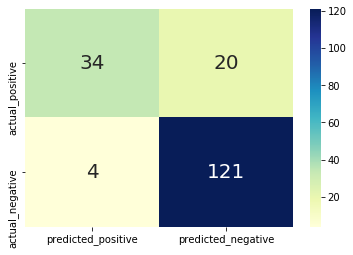

In [106]:
cm = confusion_matrix(y_test, y_pred_cv_nb)
sns.heatmap(cm, xticklabels=['predicted_positive', 'predicted_negative'], yticklabels=['actual_positive', 'actual_negative'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]
accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)
f1 = round(2 * (precision * recall) / (precision + recall),3)
print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))